Image: 009331


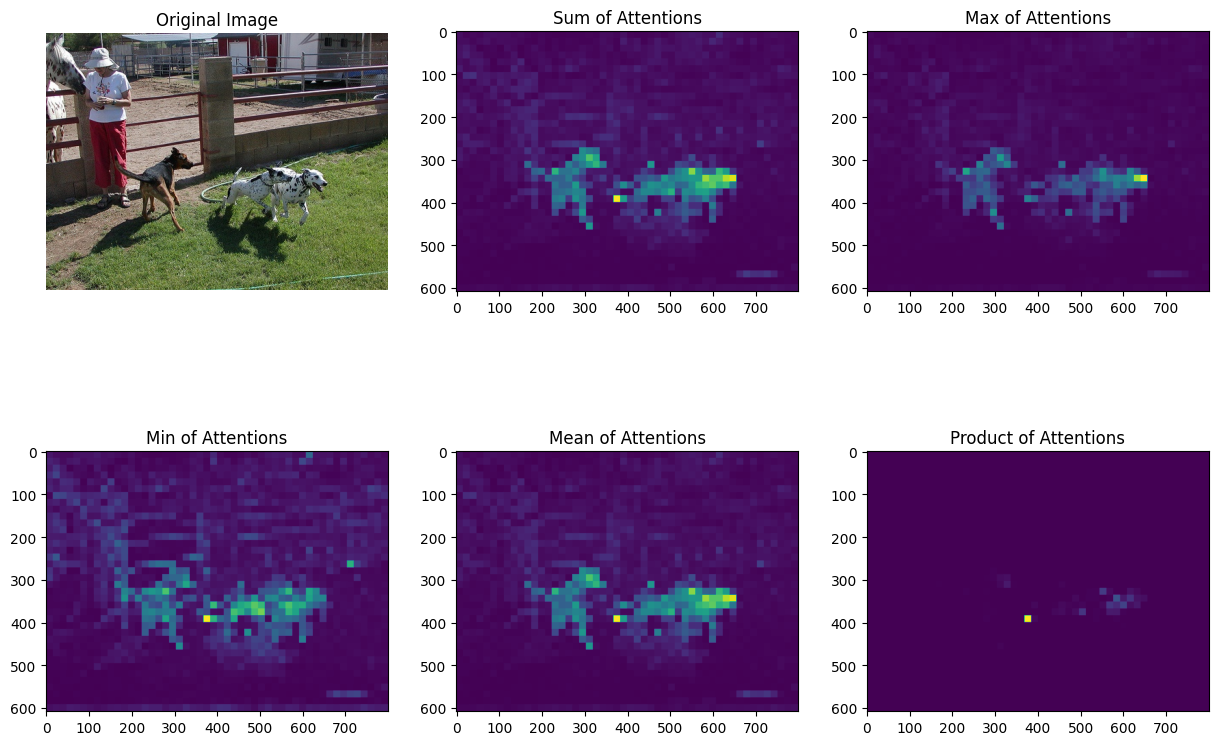

Image: 002439


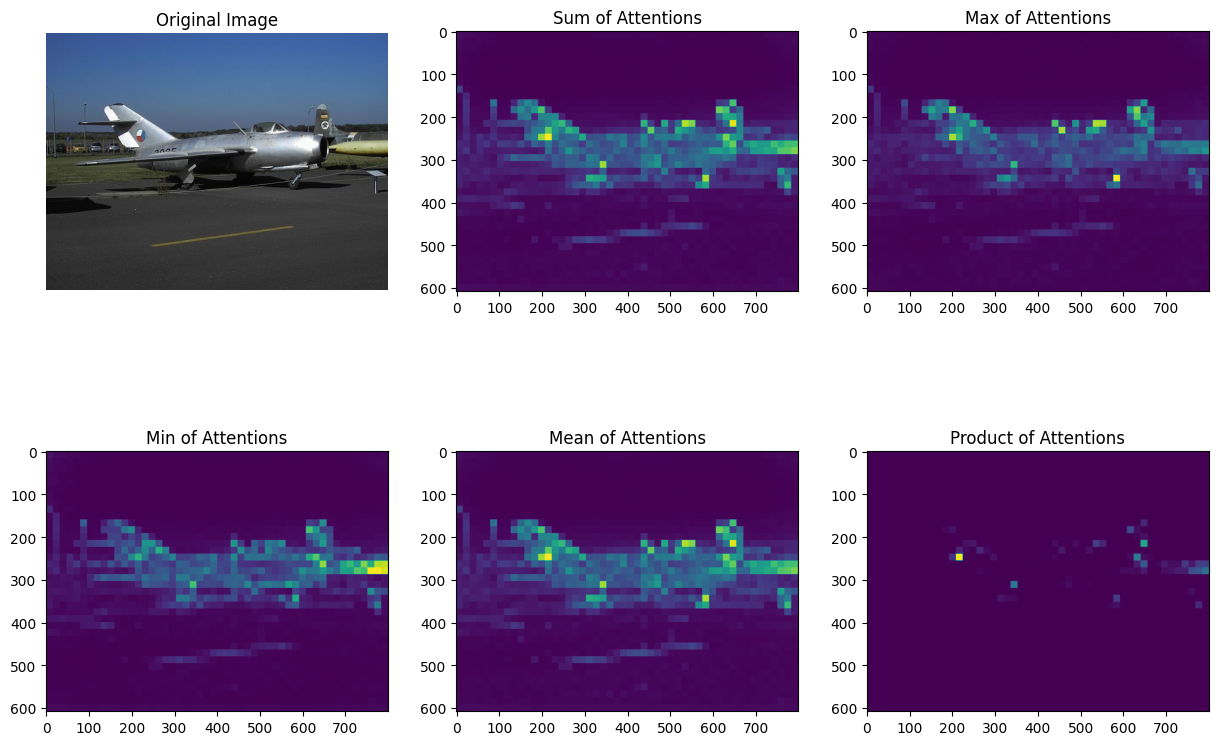

Image: 005365


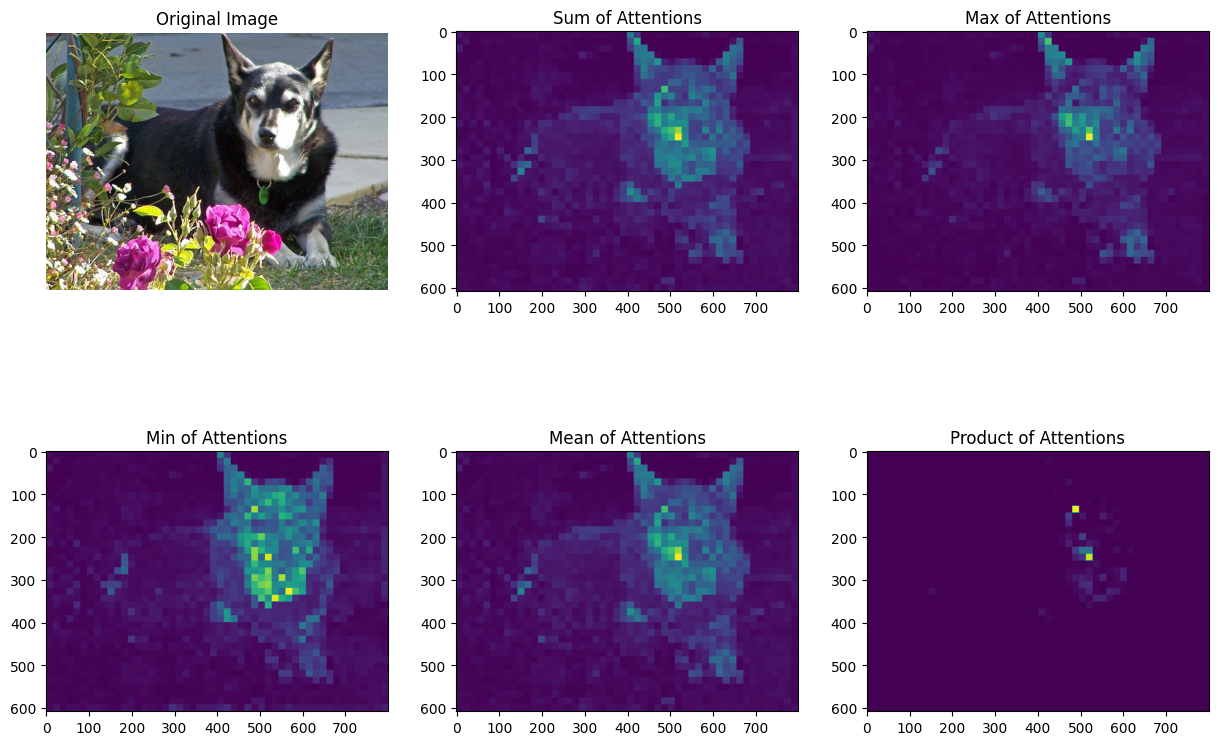

Image: 007621


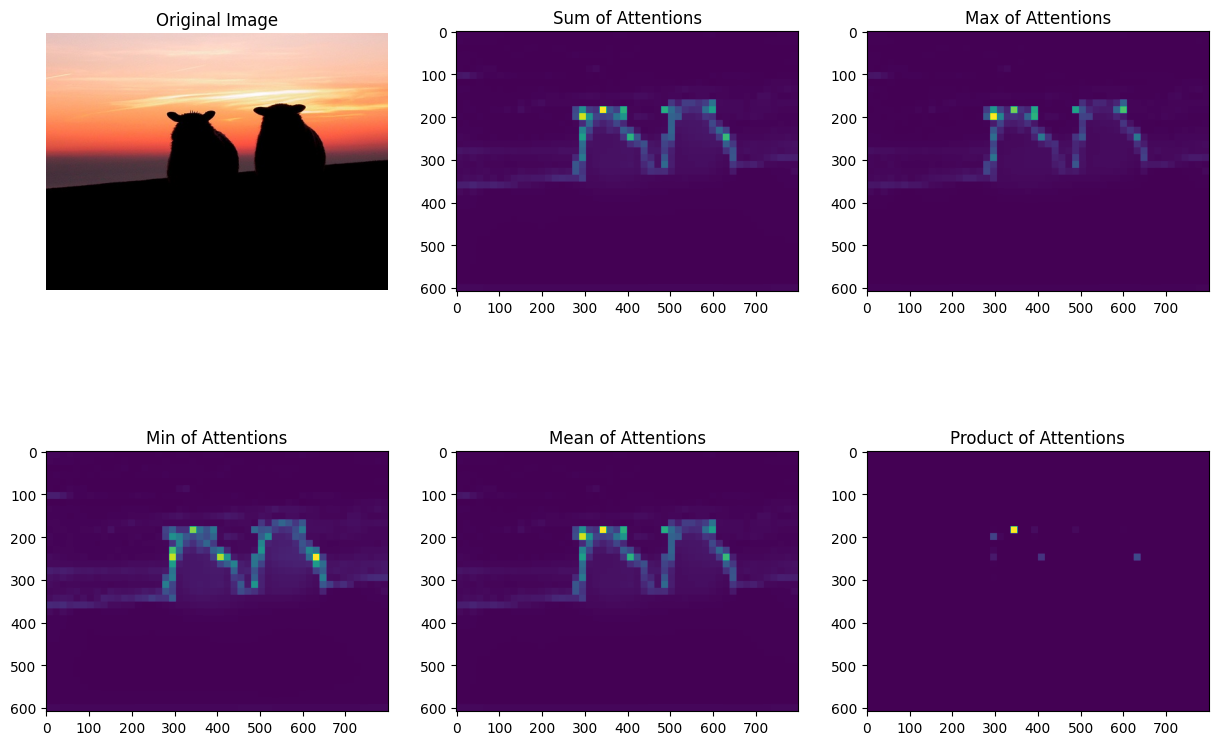

Image: 006968


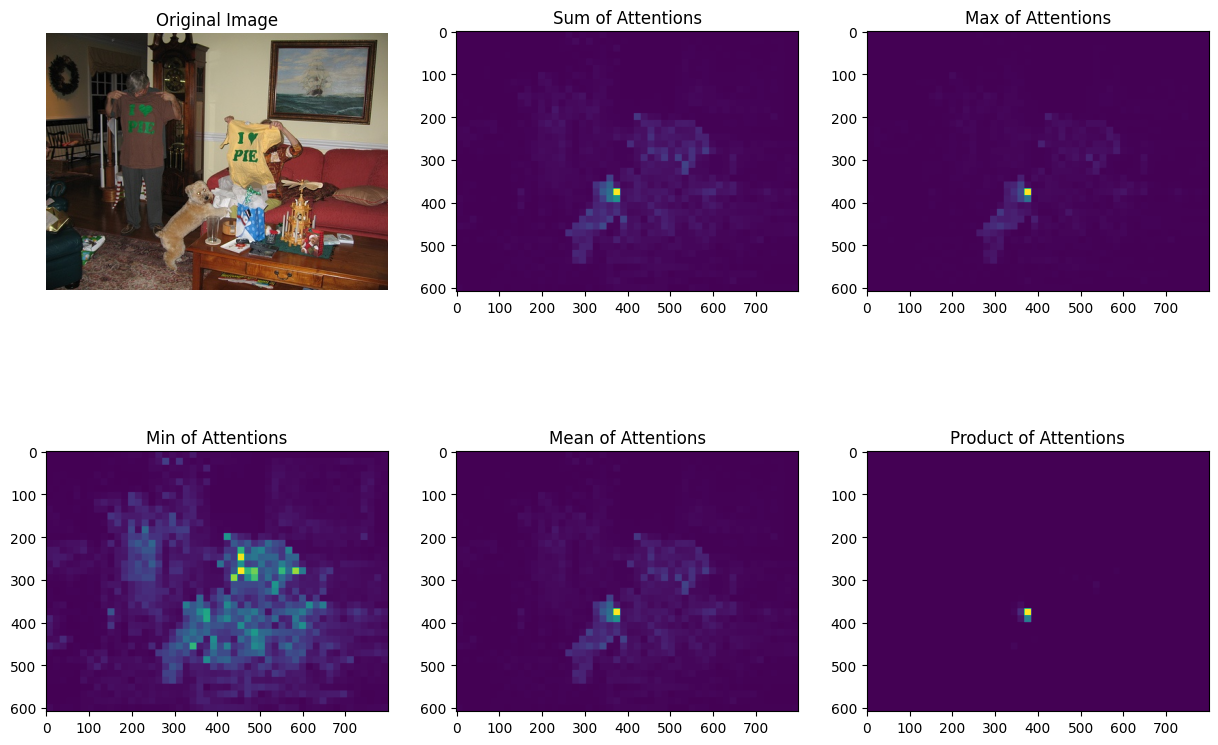

In [2]:
import torch
from torch import nn
from PIL import Image

from tqdm import tqdm

from myutils.depth import *
from myutils.dino1 import load_dino1_model
from myutils.dino2 import load_dino2_model
from myutils.discovery import *
from myutils.pascal_voc import *
from myutils.ssl import *
from myutils.utils import *
from myutils.datasets import bbox_iou

import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt

from transformers import  DPTForDepthEstimation, DPTImageProcessor

import base64
import json
import argparse
from datetime import datetime

# dino v1
params = {
    'patch_size': 16,
    'ssl_checkpoint': 'pretrained/dino_deitsmall16_pretrain.pth',
#    'depth_checkpoint': 'Intel/dpt-hybrid-midas',
    'depth_checkpoint': 'Intel/dpt-beit-base-384',
    'img_size': None
}

# dino v2
#params = {
#    'patch_size': 14,
#    'ssl_checkpoint': 'pretrained/dinov2_vits14_reg4_pretrain.pth',
#    'depth_checkpoint': 'Intel/dpt-beit-base-384',
#    'img_size': 526
#}

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get N random images from dataset_path
# n=None to get all images
dataset_path = "datasets/VOC2007/VOCdevkit/VOC2007"
images = ['009331', '002439', '005365', '007621', '006968']

for image in images:

    ##############
    # WARMING UP #
    ##############

    image_path = f"{dataset_path}/JPEGImages/{image}.jpg"

    # Read an image
    pil_img = load_image_as_pil(image_path)

    # Convert to tensor and transform
    img_tensor = load_image_as_tensor(pil_img).to(device)

    #########################
    # GETTING THE ATTENTION #
    #########################

    # Padding the image with zeros to fit multiple of patch-size
    patch_size = params['patch_size']
    img_paded = img_tensor_padded(img_tensor, patch_size).to(device)

    # Load the SSL model
    model = load_dino1_model(patch_size, params['ssl_checkpoint'], device, params['img_size'])
    #model = load_dino2_model(patch_size, params['ssl_checkpoint'], device, params['img_size'])
    model.to(device)
    model.eval()

    # Get the attentions
    atts = get_attentions(model, img_paded, patch_size)

    # Obtain the attention map

    # Sum the attention outputs (6 outputs used in DINO)
    sum_atts = atts.sum(0)
    max_atts = atts.max(0)
    min_atts = atts.min(0)
    mean_atts = atts.mean(0)
    prod_atts = atts.prod(0)

    print(f"Image: {image}")

    # print a 2x3 grid with original image and the attention maps
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)    
    plt.imshow(pil_img)
    plt.title('Original Image')
    
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(sum_atts)
    plt.title('Sum of Attentions')

    plt.subplot(2, 3, 3)
    plt.imshow(max_atts)
    plt.title('Max of Attentions')

    plt.subplot(2, 3, 4)
    plt.imshow(min_atts)
    plt.title('Min of Attentions')

    plt.subplot(2, 3, 5)
    plt.imshow(mean_atts)
    plt.title('Mean of Attentions')

    plt.subplot(2, 3, 6)
    plt.imshow(prod_atts)
    plt.title('Product of Attentions')

    plt.show()


Image: 009331


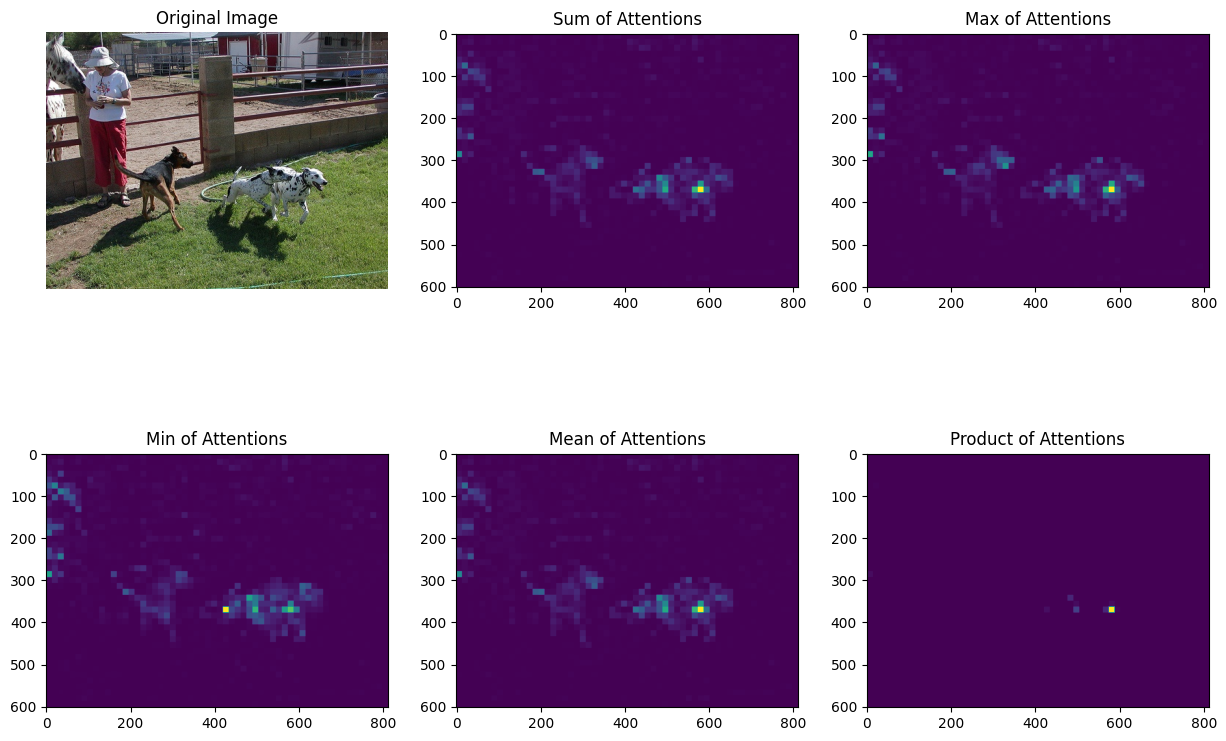

Image: 002439


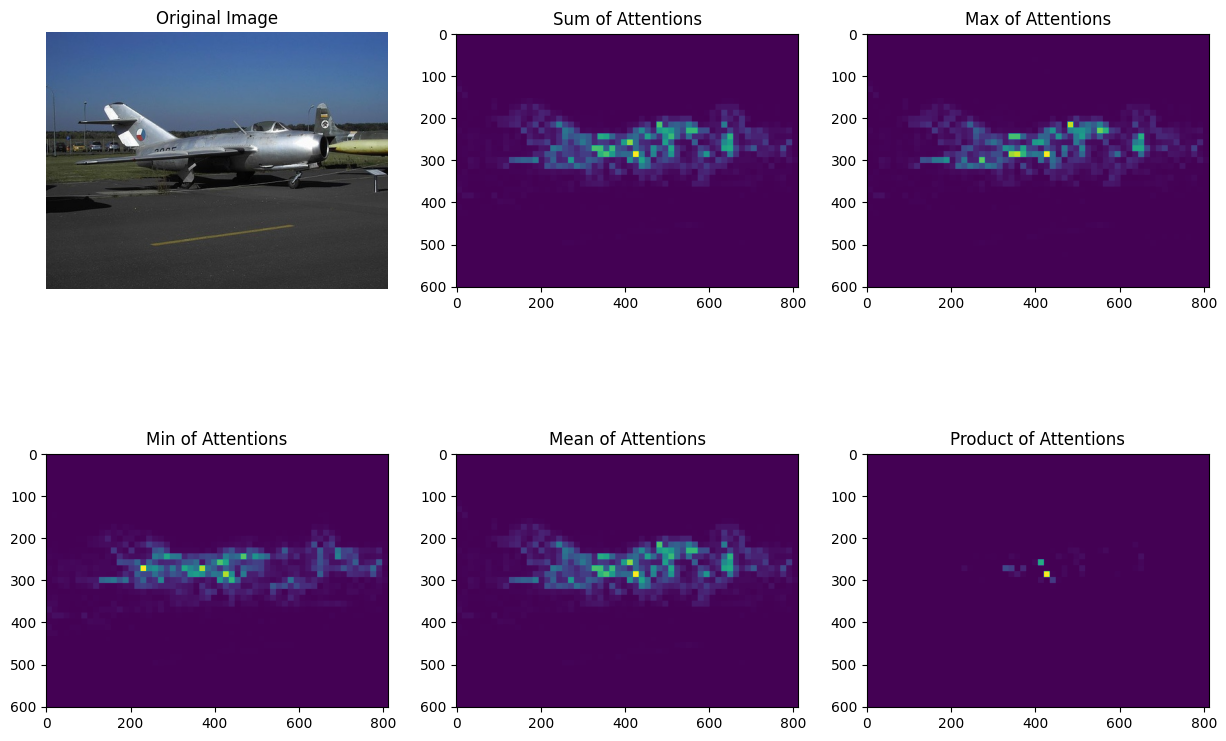

Image: 005365


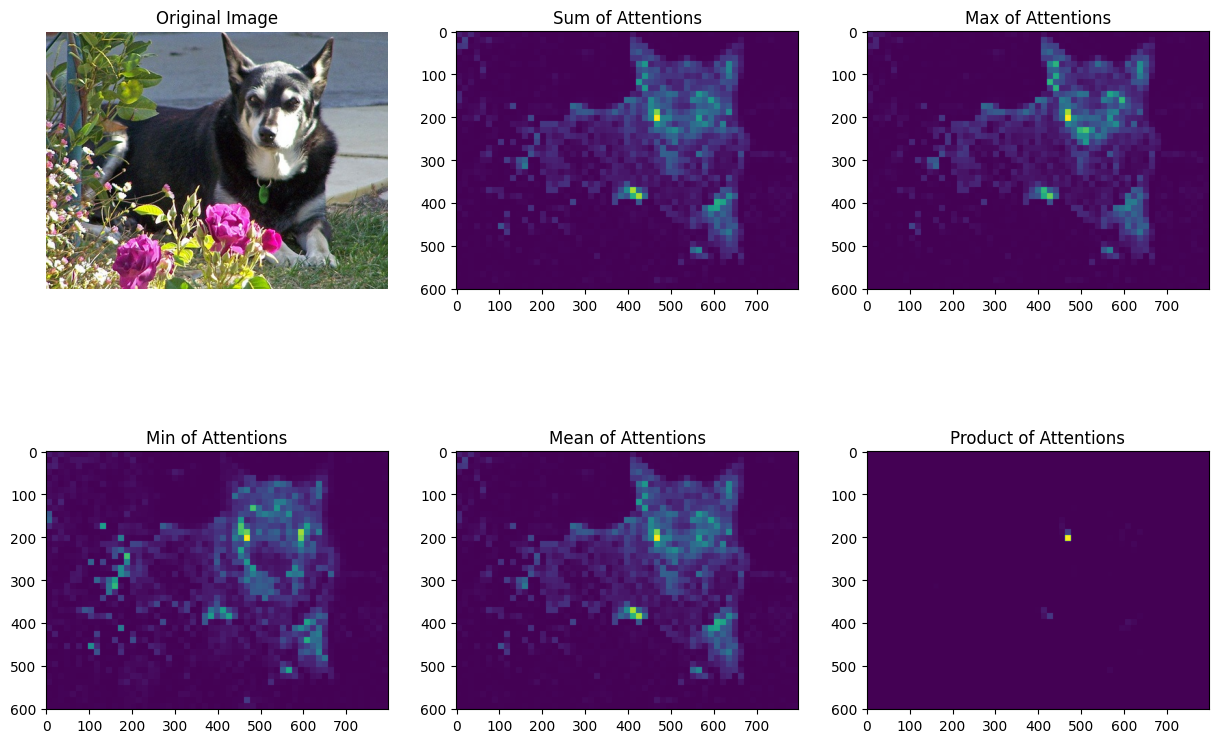

Image: 007621


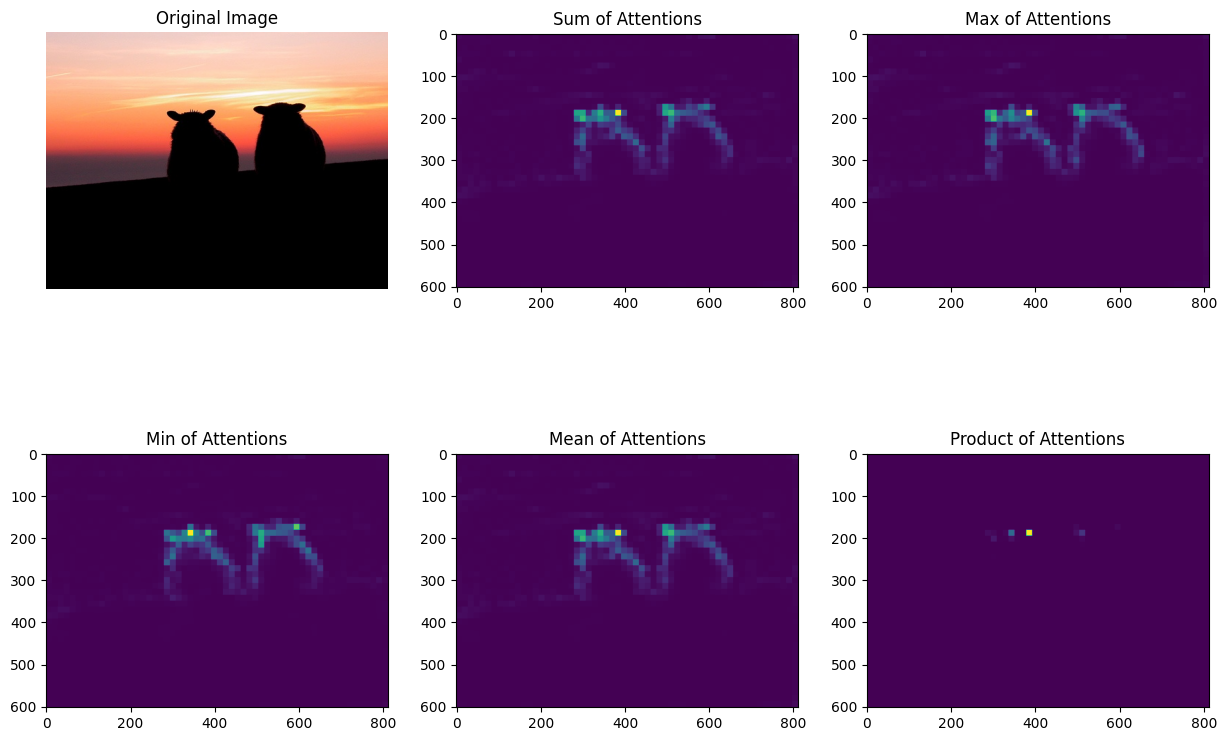

Image: 006968


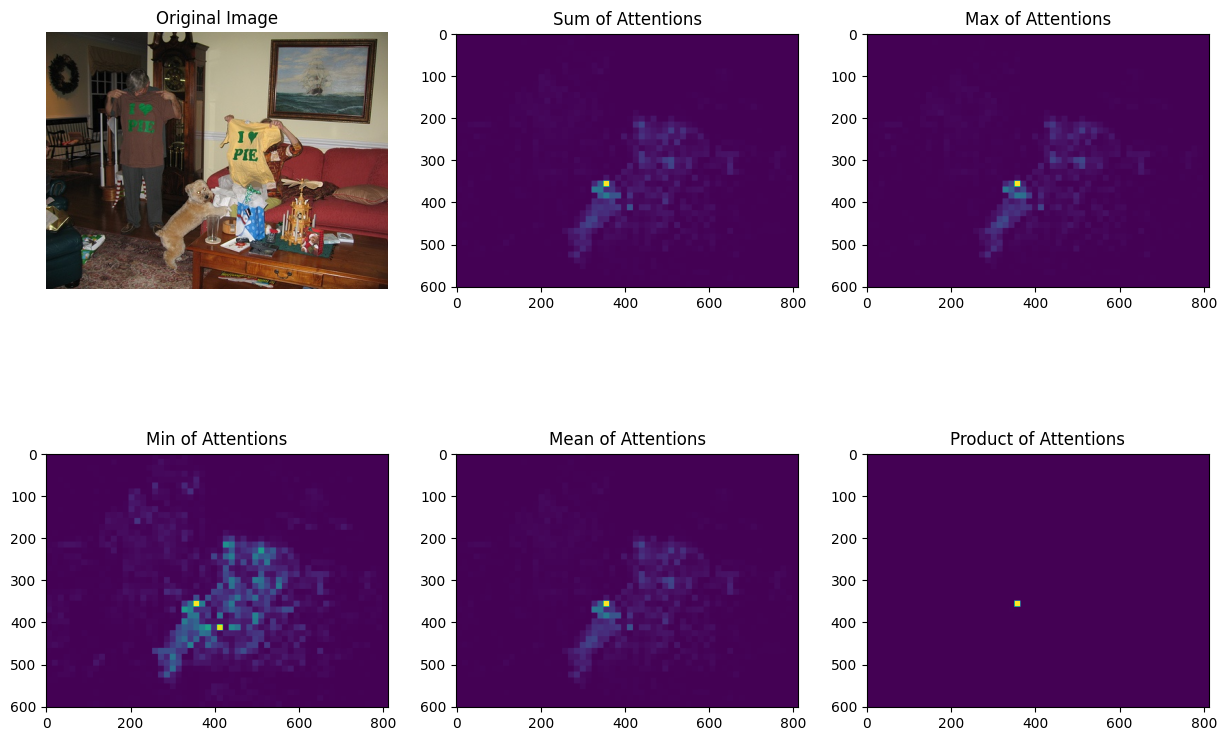

In [12]:
import torch
from torch import nn
from PIL import Image

from tqdm import tqdm

from myutils.depth import *
from myutils.dino1 import load_dino1_model
from myutils.dino2 import load_dino2_model
from myutils.discovery import *
from myutils.pascal_voc import *
from myutils.ssl import *
from myutils.utils import *
from myutils.datasets import bbox_iou

import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt

from transformers import  DPTForDepthEstimation, DPTImageProcessor

import base64
import json
import argparse
from datetime import datetime

# dino v2
params = {
    'patch_size': 14,
    'ssl_checkpoint': 'pretrained/dinov2_vits14_reg4_pretrain.pth',
    'depth_checkpoint': 'Intel/dpt-beit-base-384',
    'img_size': 526
}

# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get N random images from dataset_path
# n=None to get all images
dataset_path = "datasets/VOC2007/VOCdevkit/VOC2007"
images = ['009331', '002439', '005365', '007621', '006968']

for image in images:

    ##############
    # WARMING UP #
    ##############

    image_path = f"{dataset_path}/JPEGImages/{image}.jpg"

    # Read an image
    pil_img = load_image_as_pil(image_path)

    # Convert to tensor and transform
    img_tensor = load_image_as_tensor(pil_img).to(device)

    #########################
    # GETTING THE ATTENTION #
    #########################

    # Padding the image with zeros to fit multiple of patch-size
    patch_size = params['patch_size']
    img_paded = img_tensor_padded(img_tensor, patch_size).to(device)

    # Load the SSL model
    #model = load_dino1_model(patch_size, params['ssl_checkpoint'], device, params['img_size'])
    model = load_dino2_model(patch_size, params['ssl_checkpoint'], device, params['img_size'])
    model.to(device)
    model.eval()

    # Get the attentions
    atts = get_attentions(model, img_paded, patch_size)

    # Obtain the attention map

    # Sum the attention outputs (6 outputs used in DINO)
    sum_atts = atts.sum(0)
    max_atts = atts.max(0)
    min_atts = atts.min(0)
    mean_atts = atts.mean(0)
    prod_atts = atts.prod(0)

    print(f"Image: {image}")

    # print a 2x3 grid with original image and the attention maps
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)    
    plt.imshow(pil_img)
    plt.title('Original Image')
    
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(sum_atts)
    plt.title('Sum of Attentions')

    plt.subplot(2, 3, 3)
    plt.imshow(max_atts)
    plt.title('Max of Attentions')

    plt.subplot(2, 3, 4)
    plt.imshow(min_atts)
    plt.title('Min of Attentions')

    plt.subplot(2, 3, 5)
    plt.imshow(mean_atts)
    plt.title('Mean of Attentions')

    plt.subplot(2, 3, 6)
    plt.imshow(prod_atts)
    plt.title('Product of Attentions')

    plt.show()
